In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [105]:
print(pd.options.display.max_rows)
print(pd.options.display.max_columns)

100
100


In [106]:
orig_data = pd.read_csv('C:/Users/koryu/Downloads/cumulative.csv', sep = ',', engine = 'python')

"""
kepid:          KepID
kepoi_name:     KOI Name
kepler_name:    Kepler Name
koi_disposition: Exoplanet Archive Disposition
koi_pdisposition: Disposition Using Kepler Data
koi_score:      Disposition Score
koi_fpflag_nt:  Not Transit-Like False Positive Flag
koi_fpflag_ss:  Stellar Eclipse False Positive Flag
koi_fpflag_co:  Centroid Offset False Positive Flag
koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
koi_period:     Orbital Period [days]
koi_period_err1: Orbital Period Upper Unc. [days]
koi_period_err2: Orbital Period Lower Unc. [days]
koi_time0bk:    Transit Epoch [BKJD]
koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]
koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]
koi_impact:     Impact Parameter
koi_impact_err1: Impact Parameter Upper Unc.
koi_impact_err2: Impact Parameter Lower Unc.
koi_duration:   Transit Duration [hrs]
koi_duration_err1: Transit Duration Upper Unc. [hrs]
koi_duration_err2: Transit Duration Lower Unc. [hrs]
koi_depth:      Transit Depth [ppm]
koi_depth_err1: Transit Depth Upper Unc. [ppm]
koi_depth_err2: Transit Depth Lower Unc. [ppm]
koi_prad:       Planetary Radius [Earth radii]
koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]
koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]
koi_teq:        Equilibrium Temperature [K]
koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]
koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]
koi_insol:      Insolation Flux [Earth flux]
koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]
koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]
koi_model_snr:  Transit Signal-to-Noise
koi_tce_plnt_num: TCE Planet Number
koi_tce_delivname: TCE Delivery
koi_steff:      Stellar Effective Temperature [K]
koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]
koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]
koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]
koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
koi_srad:       Stellar Radius [Solar radii]
koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]
koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]
ra:             RA [decimal degrees]
dec:            Dec [decimal degrees]
koi_kepmag:     Kepler-band [mag]
"""

In [128]:
#original data without err
new_columns_name = []
for column_name in orig_data.columns:
    if "err" not in column_name:
        continue
    new_columns_name.append(column_name)
data = orig_data.drop(columns=new_columns_name)
data
#map(lambda x: data.derop(),new_columns_name)

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.1460,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.5860,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.9690,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.2760,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.7010,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,171.201160,0.5380,4.59450,1517.5,3.90,835.0,114.81,66.5,1.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,172.979370,0.7620,3.14020,686.0,2.77,1160.0,427.65,40.2,2.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,179.554370,0.7550,2.42900,226.5,1.59,1360.0,807.74,15.0,3.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,132.250530,1.1690,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,q1_q17_dr25_tce,6227.0,3.986,1.958,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,16.068647,173.621937,0.0520,3.53470,4914.3,5.76,600.0,30.75,161.9,1.0,q1_q17_dr25_tce,5031.0,4.485,0.848,286.99948,48.375790,15.841


In [129]:
data.fillna(0)

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.1460,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.5860,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,0,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.9690,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,0,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.2760,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.7010,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,171.201160,0.5380,4.59450,1517.5,3.90,835.0,114.81,66.5,1.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,172.979370,0.7620,3.14020,686.0,2.77,1160.0,427.65,40.2,2.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,179.554370,0.7550,2.42900,226.5,1.59,1360.0,807.74,15.0,3.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
8,9,6721123,K00114.01,0,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,132.250530,1.1690,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,q1_q17_dr25_tce,6227.0,3.986,1.958,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,16.068647,173.621937,0.0520,3.53470,4914.3,5.76,600.0,30.75,161.9,1.0,q1_q17_dr25_tce,5031.0,4.485,0.848,286.99948,48.375790,15.841


In [130]:
data.head(10)

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,1.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160.0,427.65,40.2,2.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,2.566589,179.554370,0.755,2.42900,226.5,1.59,1360.0,807.74,15.0,3.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,7.361790,132.250530,1.169,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,q1_q17_dr25_tce,6227.0,3.986,1.958,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,16.068647,173.621937,0.052,3.53470,4914.3,5.76,600.0,30.75,161.9,1.0,q1_q17_dr25_tce,5031.0,4.485,0.848,286.99948,48.375790,15.841


In [131]:
data.tail(1)

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
9563,9564,7117126,K07814.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,0,1,1,0.566717,131.969971,0.606,2.6079,18.5,0.43,2096.0,4581.82,11.1,1.0,q1_q17_dr25_tce,5544.0,4.438,0.957,291.58408,42.622181,13.724


In [132]:
data.columns

Index(['loc_rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [133]:
new_columns_name = []
for column_name in data.columns:
    if "koi_" in column_name:
        new_columns_name.append(column_name.replace("koi_",""))
        continue
    new_columns_name.append(column_name)   
data.columns = new_columns_name

In [134]:
data.columns

Index(['loc_rowid', 'kepid', 'kepoi_name', 'kepler_name', 'disposition',
       'pdisposition', 'score', 'fpflag_nt', 'fpflag_ss', 'fpflag_co',
       'fpflag_ec', 'period', 'time0bk', 'impact', 'duration', 'depth', 'prad',
       'teq', 'insol', 'model_snr', 'tce_plnt_num', 'tce_delivname', 'steff',
       'slogg', 'srad', 'ra', 'dec', 'kepmag'],
      dtype='object')

In [135]:
data.shape

(9564, 28)

In [136]:
type(data['duration'])

pandas.core.series.Series

In [137]:
pd.core.series.Series(data['duration'],range(0,10))

0    2.95750
1    4.50700
2    1.78220
3    2.40641
4    1.65450
5    4.59450
6    3.14020
7    2.42900
8    5.02200
9    3.53470
Name: duration, dtype: float64

In [138]:
data[['score', 'duration']].head()

,score,duration
0,1.000,2.95750
1,0.969,4.50700
2,0.000,1.78220
3,0.000,2.40641
4,1.000,1.65450


In [139]:
print(data['duration'][3])
print(data['duration'].dtype)
print(type(data['duration'][3]))
print(type(data[['score', 'duration']]))

2.4064099999999997
float64
<class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>


In [140]:
data[['score', 'duration']].head(3)

,score,duration
0,1.000,2.9575
1,0.969,4.5070
2,0.000,1.7822


In [141]:
data.describe()

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [142]:
corr_mat = data.corr()

In [143]:
type(corr_mat)

pandas.core.frame.DataFrame

In [144]:
corr_mat

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
loc_rowid,1.000000,0.021224,-0.454655,0.015537,0.160310,0.033354,0.071858,0.003541,0.073713,0.033465,0.158378,0.224717,0.028462,0.109275,0.026869,0.182419,-0.057856,0.138601,-0.153325,0.065765,0.042372,0.017805,-0.105312
kepid,0.021224,1.000000,0.095225,0.008139,-0.048630,-0.098636,-0.044213,0.011511,0.013620,0.000358,-0.026407,-0.017483,0.003681,-0.058705,-0.012403,0.000998,0.025220,-0.025494,0.052255,-0.027171,-0.002288,0.993587,0.017525
score,-0.454655,0.095225,1.000000,-0.006986,-0.556077,-0.510013,-0.398247,-0.070669,-0.008329,-0.214340,-0.173200,-0.301010,-0.076870,-0.302279,-0.030995,-0.269034,0.209081,-0.192544,0.150017,-0.071767,-0.168666,0.094944,0.042112
fpflag_nt,0.015537,0.008139,-0.006986,1.000000,-0.023270,-0.004575,0.000576,0.001554,0.016143,0.001844,0.015080,-0.005423,0.002195,-0.004703,-0.000075,-0.007878,-0.003074,0.001885,-0.001982,0.000393,0.012693,0.007914,-0.003753
fpflag_ss,0.160310,-0.048630,-0.556077,-0.023270,1.000000,0.151233,0.096539,-0.020557,-0.117435,0.042286,0.028321,0.426244,0.001396,0.204909,0.039564,0.437881,-0.182321,0.107830,-0.076140,0.047205,0.086374,-0.048116,0.000628
fpflag_co,0.033354,-0.098636,-0.510013,-0.004575,0.151233,1.000000,0.523851,-0.020804,-0.123592,0.005343,-0.046753,-0.125225,-0.012231,0.268092,0.023024,-0.127536,-0.132786,0.017717,-0.018899,0.041572,0.159923,-0.097175,0.060592
fpflag_ec,0.071858,-0.044213,-0.398247,0.000576,0.096539,0.523851,1.000000,-0.017021,-0.101114,-0.004968,0.018982,-0.086800,-0.010145,0.217612,0.030209,-0.089809,-0.095758,0.011633,0.002046,0.019290,0.070498,-0.045119,0.039075
period,0.003541,0.011511,-0.070669,0.001554,-0.020557,-0.020804,-0.017021,1.000000,0.095580,0.004928,0.037302,-0.009180,0.005135,-0.049097,-0.002603,-0.009614,-0.015107,-0.013552,0.001877,-0.000993,0.005670,0.011479,-0.009858
time0bk,0.073713,0.013620,-0.008329,0.016143,-0.117435,-0.123592,-0.101114,0.095580,1.000000,0.049241,0.216271,-0.051015,0.034992,-0.324462,-0.022279,-0.058781,0.003827,0.008367,-0.006220,-0.004924,-0.029615,0.012702,0.010124
impact,0.033465,0.000358,-0.214340,0.001844,0.042286,0.005343,-0.004968,0.004928,0.049241,1.000000,0.036955,0.005595,0.677380,-0.009982,-0.003659,-0.000476,-0.008040,0.016070,-0.059275,0.022645,0.022464,-0.001804,-0.009796


In [170]:
mask_ = corr_mat < 0.2
mask_

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
loc_rowid,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True
kepid,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
score,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
fpflag_nt,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
fpflag_ss,True,True,True,True,False,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True
fpflag_co,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
fpflag_ec,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
period,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
time0bk,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True
impact,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True


In [171]:
corr_mat.mask(mask_)

,loc_rowid,kepid,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
loc_rowid,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kepid,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993587,NaN
score,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209081,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_nt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_ss,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.426244,NaN,0.204909,NaN,0.437881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_co,NaN,NaN,NaN,NaN,NaN,1.000000,0.523851,NaN,NaN,NaN,NaN,NaN,NaN,0.268092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fpflag_ec,NaN,NaN,NaN,NaN,NaN,0.523851,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.217612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time0bk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.216271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,0.67738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E00140BE0>,
      dtype=object)

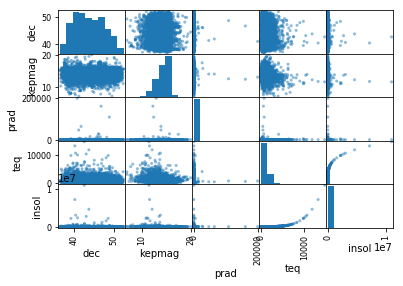

In [176]:
scatter_matrix(data[['dec','kepmag','prad','teq','insol']])

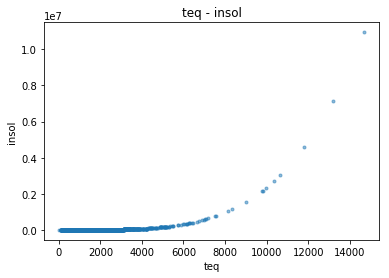

In [178]:
plt.plot(data['teq'], data['insol'], '.', alpha = 0.5)
plt.xlabel('teq')
plt.ylabel('insol')
plt.title('teq - insol')

pass

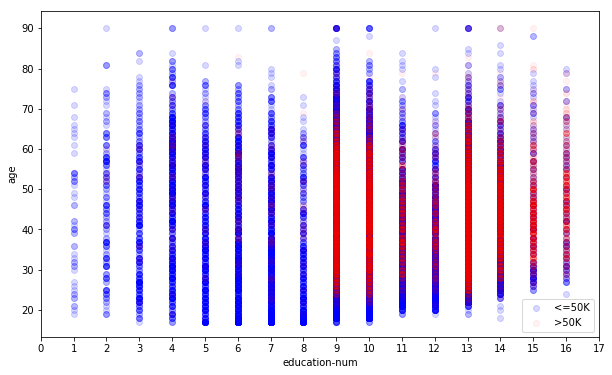

In [86]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == '<=50K']['education-num'],
            data[data['class'] == '<=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data[data['class'] == '>50K']['education-num'],
            data[data['class'] == '>50K']['age'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('education-num')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('age')
plt.legend()
#plt.grid()

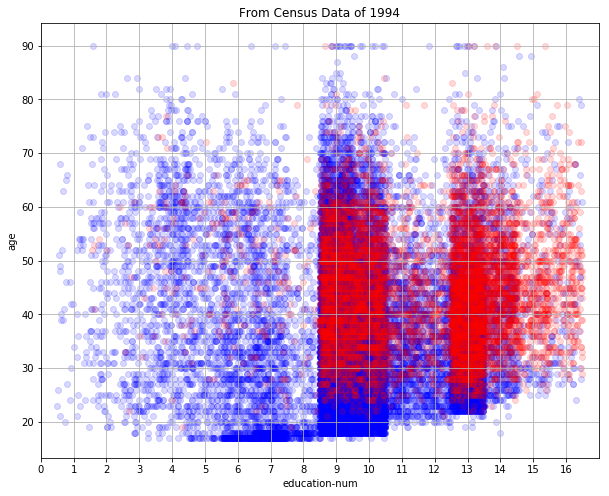

In [87]:
np.random.seed(0)
education_num_rnd = data['education-num'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['class'] == '<=50K'],
            data[data['class'] == '<=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(education_num_rnd[data['class'] == '>50K'],
            data[data['class'] == '>50K']['age'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.xlabel('education-num')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('age')
plt.title('From Census Data of 1994')
plt.grid()

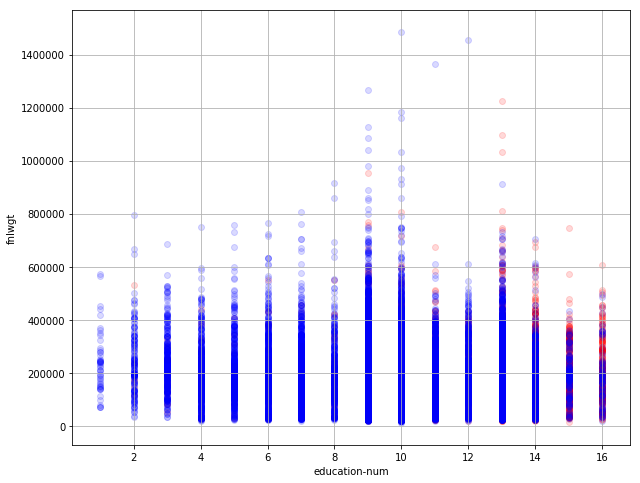

In [88]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['class'] == '>50K']['education-num'],
            data[data['class'] == '>50K']['fnlwgt'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.scatter(data[data['class'] == '<=50K']['education-num'],
            data[data['class'] == '<=50K']['fnlwgt'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.xlabel('education-num')
plt.ylabel('fnlwgt')
plt.grid()

In [180]:
data.describe(include = ['object'])

,kepoi_name,kepler_name,disposition,pdisposition,tce_delivname
count,9564,2298,9564,9564,9218
unique,9564,2298,3,2,3
top,K04621.01,Kepler-136 b,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
freq,1,1,4840,4847,8054


In [208]:
data.describe(include = ['int64'])

,loc_rowid,kepid,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000
mean,4782.500000,7.690628e+06,0.208595,0.232748,0.197512,0.120033
std,2761.033321,2.653459e+06,4.767290,0.422605,0.398142,0.325018
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000
50%,4782.500000,7.906892e+06,0.000000,0.000000,0.000000,0.000000
75%,7173.250000,9.873066e+06,0.000000,0.000000,0.000000,0.000000
max,9564.000000,1.293514e+07,465.000000,1.000000,1.000000,1.000000


In [209]:
data.describe(include = ['float64'])

,score,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,steff,slogg,srad,ra,dec,kepmag
count,8054.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,0.480829,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,0.476928,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,0.334000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,0.998000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [181]:
data.describe(include = 'all')

,loc_rowid,kepid,kepoi_name,kepler_name,disposition,pdisposition,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,tce_delivname,steff,slogg,srad,ra,dec,kepmag
count,9564.000000,9.564000e+03,9564,2298,9564,9564,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9218,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
unique,NaN,NaN,9564,2298,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,K04621.01,Kepler-136 b,FALSE POSITIVE,FALSE POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q1_q17_dr25_tce,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,4840,4847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8054,NaN,NaN,NaN,NaN,NaN,NaN
mean,4782.500000,7.690628e+06,NaN,NaN,NaN,NaN,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,NaN,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,NaN,NaN,NaN,NaN,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,NaN,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,NaN,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,NaN,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,NaN,NaN,NaN,NaN,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,NaN,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,NaN,NaN,NaN,NaN,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,NaN,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000


In [185]:
data.score.describe()

count    8054.000000
mean        0.480829
std         0.476928
min         0.000000
25%         0.000000
50%         0.334000
75%         0.998000
max         1.000000
Name: score, dtype: float64

In [188]:
print(data['disposition'].unique())
print(data['pdisposition'].unique())

['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']
['CANDIDATE' 'FALSE POSITIVE']


In [197]:
data.head(1)

,loc_rowid,kepid,kepoi_name,kepler_name,disposition,pdisposition,score,fpflag_nt,fpflag_ss,fpflag_co,fpflag_ec,period,time0bk,impact,duration,depth,prad,teq,insol,model_snr,tce_plnt_num,tce_delivname,steff,slogg,srad,ra,dec,kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,9.488036,170.53875,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347


In [200]:
#np.set_printoptions(threshold=10)#np.nan
l = data['kepler_name'].unique()
print(len(l))
print(l)

2299
['Kepler-227 b' 'Kepler-227 c' nan ... 'Kepler-92 d' 'Kepler-1494 b'
 'Kepler-1600 b']


In [203]:
print(data['kepid'].unique())
print(len(data['kepid'].unique()))

[10797460 10811496 10848459 ...  2987433  9471539  7117126]
8214


## Задача

# Подготовка данных

In [111]:
data['workclass'].dtype.name

'object'

In [112]:
data['education-num'].dtype.name

'int64'

In [113]:
#categorical_columns = []
#numerical_columns = []
#for c in data.columns:
#    if data[c].dtype.name == 'object':
#        categorical_columns.append(c)
#    else:
#        numerical_columns.append(c)          

In [114]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'class']
['age', 'education-num', 'hours-per-week']


In [115]:
for c in categorical_columns:
    print(c, data[c].unique())

workclass ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
marital-status ['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
class ['<=50K' '>50K']


## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [116]:
data.median(axis = 0)

age               37.0
education-num     10.0
hours-per-week    40.0
dtype: float64

In [38]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [39]:
data[numerical_columns].count(axis = 0)

age               32561
fnlwgt            32561
education-num     32561
hours-per-week    32561
dtype: int64

In [40]:
data[categorical_columns].count(axis = 0)

workclass         30725
marital-status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
class             32561
dtype: int64

In [41]:
data['workclass'].describe()

count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

In [49]:
type(data['workclass'].describe())

pandas.core.series.Series

In [42]:
data['workclass'].describe().top

'Private'

In [43]:
data['workclass'] = data['workclass'].fillna('Private')

In [44]:
data.describe(include = [object])

,workclass,marital-status,occupation,relationship,race,sex,class
count,32561,32561,30718,32561,32561,32561,32561
unique,9,7,14,6,5,2,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K
freq,22696,14976,4140,13193,27816,21790,24720


In [45]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [46]:
data.describe(include = [object])

,workclass,marital-status,occupation,relationship,race,sex,class
count,32561,32561,32561,32561,32561,32561,32561
unique,9,7,14,6,5,2,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K
freq,22696,14976,5983,13193,27816,21790,24720


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [47]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'class'] ['workclass', 'marital-status', 'occupation', 'relationship', 'race']


In [48]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [49]:
data.at[data['sex'] == 'Male', 'sex'] = 0
data.at[data['sex'] == 'Female', 'sex'] = 1
data['sex'].describe()

count     32561
unique        2
top           0
freq      21790
Name: sex, dtype: int64

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 5 различных значений: 

In [50]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

Заменим признак `race` 5 признаками: `race_White`, `race_Black`, ..., `race_Other`.

 - Если признак `race` принимает значение `White`, то признак `race_White` равен `1`, а все остальные равны `0`.
 - Если признак `race` принимает значение `Black`, то признак `race_Black` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [51]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'workclass_private', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-fami

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [52]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,fnlwgt,education-num,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [53]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [54]:
data_numerical.describe()

,age,fnlwgt,education-num,hours-per-week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.549411e-17,-8.848779e-17,2.539659e-16,-1.323354e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.582182e+00,-1.681605e+00,-3.529602e+00,-3.193981e+00
25%,-7.757560e-01,-6.816805e-01,-4.200532e-01,-3.542890e-02
50%,-1.159528e-01,-1.082176e-01,-3.135955e-02,-3.542890e-02
75%,6.904732e-01,4.478697e-01,7.460277e-01,3.695137e-01
max,3.769554e+00,1.226837e+01,2.300802e+00,4.742894e+00


## Соединяем все в одну таблицу

In [55]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(32561, 47)


In [56]:
data.describe()

,age,fnlwgt,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,-2.549411e-17,-8.848779e-17,2.539659e-16,-1.323354e-15,0.029483,0.064279,0.000215,0.697030,0.034274,0.078038,...,0.255060,0.030128,0.155646,0.105832,0.048156,0.009551,0.031909,0.095943,0.008323,0.854274
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.169159,0.245254,0.014661,0.459549,0.181935,0.268236,...,0.435901,0.170942,0.362525,0.307627,0.214099,0.097264,0.175761,0.294518,0.090851,0.352837
min,-1.582182e+00,-1.681605e+00,-3.529602e+00,-3.193981e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.757560e-01,-6.816805e-01,-4.200532e-01,-3.542890e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.159528e-01,-1.082176e-01,-3.135955e-02,-3.542890e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.904732e-01,4.478697e-01,7.460277e-01,3.695137e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.769554e+00,1.226837e+01,2.300802e+00,4.742894e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [46]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns


In [47]:
type(feature_names)

pandas.indexes.base.Index

In [49]:
feature_names

In [60]:
print(X.shape)
print(y.shape)
N, d = X.shape

(32561, 46)
(32561,)


In [50]:
type(X)

pandas.core.frame.DataFrame

In [61]:
type(y)

pandas.core.series.Series

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

22792 9769


In [51]:
22792+9769

32561

In [63]:
#data_drop = data.drop('capital-gain',   axis = 1)\
#                .drop('capital-loss',   axis = 1)\
#                .drop('education',      axis = 1)\
#                .drop('fnlwgt',         axis = 1)\
#                .drop('workclass',      axis = 1)\
#                .drop('race',           axis = 1)\
#                .drop('sex',            axis = 1)\
#                .drop('native-country', axis = 1)\
#                .drop('class',          axis = 1)    

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [65]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [66]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.146367146367 0.163066844099


In [67]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [68]:
err_test

0.16306684409867944

In [69]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[6937  613]
 [ 980 1239]]


In [70]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

### Подбор параметров

In [75]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.167076167076 35


In [76]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.158081783082 0.161940833248


# SVC

In [77]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.164531414531 0.157641519091


### Подбор параметров

In [79]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)


KeyboardInterrupt



In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [80]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

4.3875043875e-05 0.167673252124


### Значимость признаков

In [81]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [82]:
np.sum(rf.feature_importances_)

0.99999999999999967

In [83]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'fnlwgt' (0.206736)
 2. feature '  age' (0.183969)
 3. feature 'education-num' (0.135674)
 4. feature 'hours-per-week' (0.100523)
 5. feature 'marital-status_Married-civ-spouse' (0.071025)
 6. feature 'relationship_Husband' (0.047541)
 7. feature 'marital-status_Never-married' (0.024367)
 8. feature 'occupation_Exec-managerial' (0.021841)
 9. feature '  sex' (0.013883)
10. feature 'occupation_Prof-specialty' (0.012760)
11. feature 'workclass_Private' (0.011500)
12. feature 'relationship_Not-in-family' (0.011351)
13. feature 'relationship_Wife' (0.010969)
14. feature 'occupation_Other-service' (0.009693)
15. feature 'workclass_Self-emp-not-inc' (0.009357)
16. feature 'relationship_Own-child' (0.009145)
17. feature 'workclass_Self-emp-inc' (0.007903)
18. feature 'race_White' (0.007806)
19. feature 'occupation_Sales' (0.007469)
20. feature 'marital-status_Divorced' (0.007117)
21. feature 'occupation_Craft-repair' (0.007087)
22. feature 'workclass_Local-gov' (0

In [84]:
feature_names[[1,0,1]]

Index(['fnlwgt', 'age', 'fnlwgt'], dtype='object')

(-1, 20)

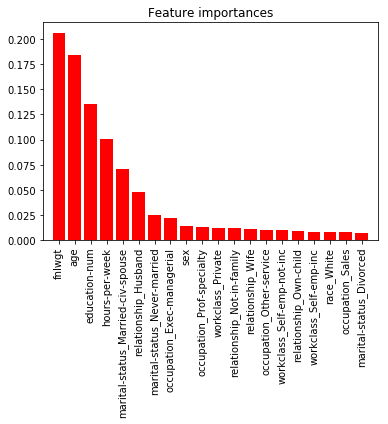

In [85]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [86]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

4.3875043875e-05 0.182311393183


# AdaBoost

In [87]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.159178659179 0.157948612959


# GBT

In [88]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.125351000351 0.156106049749
